In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv(r'D:\Data Science\ML\shampoo-sales.csv')

In [6]:
df.dropna(inplace=True)

In [7]:
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')

In [8]:
df

,Month,Sales of shampoo over a three year period,Date
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01
5,1-06,168.5,1901-06-01
6,1-07,231.8,1901-07-01
7,1-08,224.5,1901-08-01
8,1-09,192.8,1901-09-01
9,1-10,122.9,1901-10-01


In [11]:
df.set_index('Date',drop=True,inplace=True)

In [13]:
df.drop('Month',axis=1,inplace=True)

In [14]:
df

,Sales of shampoo over a three year period
Date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


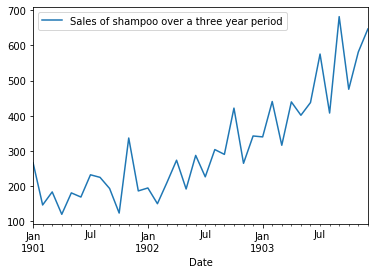

In [15]:
df.plot()

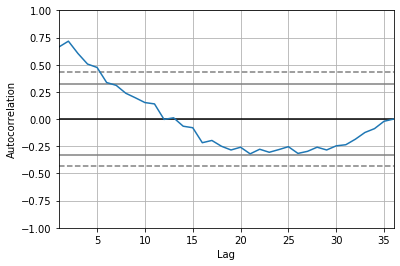

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


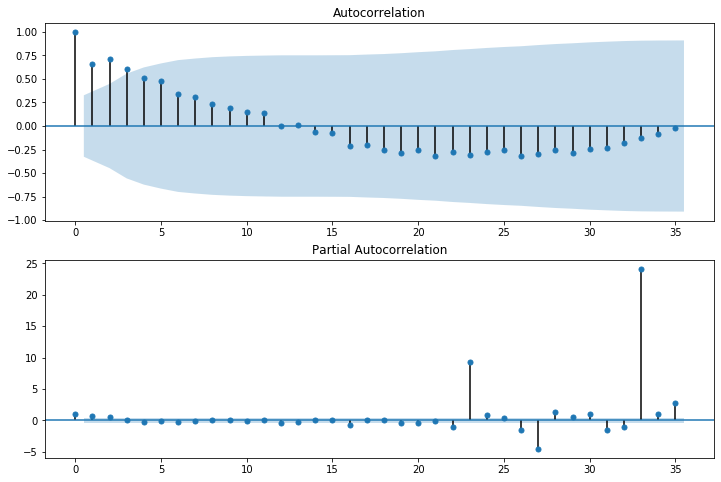

In [24]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=35, ax=ax2)

In [26]:
training_data=df[0:30]
test_data=df[30:]

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
arima= ARIMA(training_data,order=(5,1,2))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
model=arima.fit()

In [30]:
model.aic

327.77487100245366

In [43]:
pred= model.forecast(steps=6)[0]

In [44]:
pred

array([423.79190743, 484.28988418, 445.30200205, 459.6456838 ,
       454.39695258, 502.8395311 ])

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,pred))

142.60989077245202

In [46]:
arima= ARIMA(training_data,order=(5,1,3))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
model=arima.fit()

In [48]:
model.aic

330.4263502593873

In [49]:
pred= model.forecast(steps=6)[0]

In [50]:
pred

array([458.27236087, 474.00770299, 470.14575721, 457.96153051,
       484.41682724, 496.2358642 ])

In [51]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,pred))

126.10919612645493

In [80]:
arima= ARIMA(training_data,order=(5,2,3))

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [81]:
model=arima.fit()

In [82]:
model.aic

329.2310472353656

In [83]:
pred= model.forecast(steps=6)[0]

In [84]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,pred))

87.83628727112405